In [63]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [24]:
X, y = datasets.make_blobs(
    n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40
)

In [25]:
X.shape,y.shape

((100, 2), (100,))

In [26]:
y

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [27]:
# In SVM classes : -1, 1, so replacing 0 with -1
y = np.where(y == 0, -1, 1)
y

array([ 1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
        1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,
        1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,
       -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1])

In [41]:
class SVM:
    def __init__(self, _lambda=0.01,alpha = 0.001,n_iters=1000):
        self._lambda = _lambda
        self.alpha = alpha
        self.n_iters = n_iters
        self.w = None
        self.b = 0
    
    def fit(self,X,y):
        n_samples, n_features = X.shape
        
        # Replace class 0 with -1
        y = np.where(y <= 0,-1,1)
        
        self.w = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.n_iters):
            for idx,x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i,self.w) - self.b)
                if condition >= 1:
                    dw = 2 * self._lambda * self.w
                    db = 0
                else:
                    dw = 2 * self._lambda * self.w - np.dot(x_i,y[idx])
                    db = y[idx]

                # Update Weights
                self.w -= self.alpha * dw
                self.b -= self.alpha * db
    
    def predict(self,x):
        y_pred = np.dot(x,w) - self.b
        return np.sign(y_pred)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

In [48]:
svm = SVM()

In [49]:
svm.fit(X_train, y_train)

In [50]:
svm.w,svm.b

(array([0.46045689, 0.16122914]), -0.08600000000000006)

In [53]:
y_pred = svm.predict(X_test)

In [54]:
y_pred,y_test

(array([-1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,
        -1., -1., -1., -1., -1., -1.,  1.]),
 array([-1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
        -1, -1,  1]))

In [55]:
# Accuracy Score
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [56]:
accuracy(y_test,y_pred)

1.0

## Visualization

In [80]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


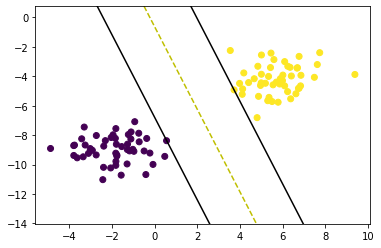

In [81]:
visualize_svm()

<AxesSubplot:>

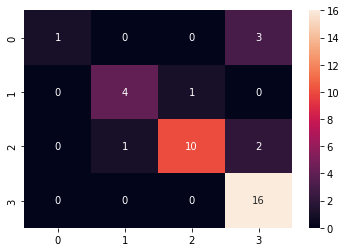

In [65]:
# confusion matrix
matrix = [[1,0,0,3],[0,4,1,0],[0,1,10,2],[0,0,0,16]]
df = pd.DataFrame(matrix)
sn.heatmap(df, annot=True)